In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
diabetes = load_diabetes()

In [3]:
X,y = diabetes.data, diabetes.target

In [13]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
y_binned = np.digitize(y, bins=[y.mean()-y.std(),y.mean()+y.std()])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.3, random_state=42)
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
acc = accuracy_score(y_test, y_preds)
print(f'Accuracy : {acc*100:.2f}%')

Accuracy : 63.16%


In [15]:
X_df = pd.DataFrame(X)
X_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [19]:
new_data = [[4, 130, 70, 20, 80, 30.5, 0.4, 45,0,0]]
new_pred = clf.predict(new_data)
print("Prediction : ","Diabetic" if new_pred[0]==1 else "Not Diabetic")

Prediction :  Diabetic


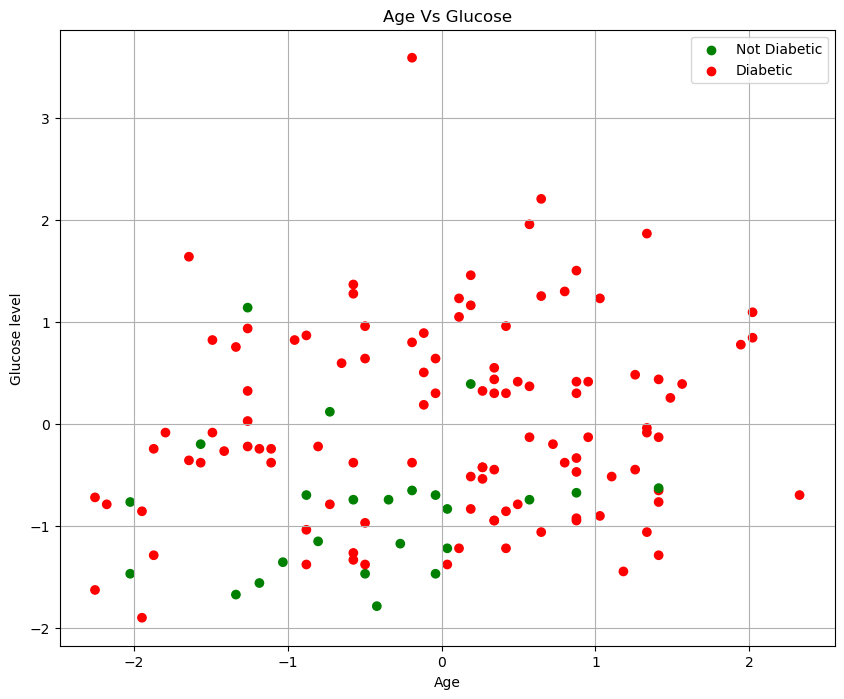

In [25]:
plt.figure(figsize=(10,8))
colors = np.where(y_preds == 0, 'green','red')
plt.scatter(X_test[:,0],X_test[:,2], color=colors)
plt.title("Age Vs Glucose")
plt.xlabel("Age")
plt.ylabel("Glucose level")
plt.scatter([],[],color='g',label='Not Diabetic')
plt.scatter([],[],color='r',label='Diabetic')
plt.legend()
plt.grid(True)
plt.show()